In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("student_performance.csv")
df.head()

,Student_ID,Gender,Age,Study_Hours,Attendance (%),Test_Score,Parental_Education,Internet_Access,Extra_Classes
0,1,Male,17,5.8,61.3,72,Postgraduate,No,No
1,2,Female,16,4.9,85.5,40,Graduate,Yes,Yes
2,3,Male,17,NaN,72.6,58,High School,No,No
3,4,Male,18,5.5,80.3,41,Postgraduate,No,Yes
4,5,Male,17,4.0,96.3,92,High School,No,No


In [3]:
df.describe()
df.shape


(50, 9)

In [9]:
df.dtypes


Student_ID              int64
Gender                 object
Age                     int64
Study_Hours           float64
Attendance (%)        float64
Test_Score              int64
Parental_Education     object
Internet_Access        object
Extra_Classes          object
dtype: object

In [4]:
df = df.fillna(df.mean(numeric_only=True))


In [5]:
df.isnull().sum()

Student_ID            0
Gender                0
Age                   0
Study_Hours           0
Attendance (%)        0
Test_Score            0
Parental_Education    0
Internet_Access       0
Extra_Classes         0
dtype: int64

In [19]:
print("Type of df:", type(df))
print(df)

Type of df: <class 'pandas.core.frame.DataFrame'>
    Student_ID  Gender  Age  Study_Hours  Attendance (%)  Test_Score  \
0            1    Male   17         5.80       61.300000          72   
1            2  Female   16         4.90       85.500000          40   
2            3    Male   17         3.38       72.600000          58   
3            4    Male   18         5.50       80.300000          41   
4            5    Male   17         4.00       96.300000          92   
5            6  Female   18         5.60       70.000000          83   
6            7    Male   18         1.40       76.400000          65   
7            8    Male   15         2.00       90.200000          71   
8            9    Male   17         1.20       69.200000          45   
9           10  Female   15         2.60       79.306667          71   
10          11    Male   17         2.90       71.600000          94   
11          12    Male   17         2.40       66.400000          43   
12          13

In [21]:
x = df[['Study_Hours']]   # Independent variable (2D DataFrame)
y = df['Test_Score'] 

In [22]:

# Step 2: Check types and shapes
print("Type of x:", type(x))
print("Type of y:", type(y))
print("x shape:", x.shape)
print("y shape:", y.shape)



Type of x: <class 'pandas.core.frame.DataFrame'>
Type of y: <class 'pandas.core.series.Series'>
x shape: (50, 1)
y shape: (50,)


In [23]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=10
)

print("Training data:", x_train.shape, y_train.shape)
print("Testing data:", x_test.shape, y_test.shape)




Training data: (40, 1) (40,)
Testing data: (10, 1) (10,)


In [24]:
#Linear Regression
model=LinearRegression()
model.fit(x,y)



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
y_pred=model.predict(x)

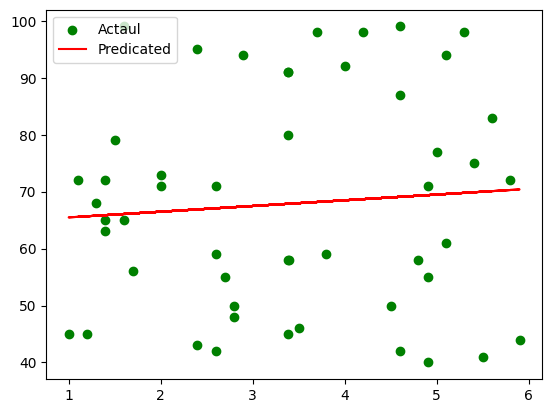

In [26]:
#without scaling
plt.scatter(x,y,color='g',label='Actaul')
plt.plot(x,y_pred,color='r',label='Predicated')

plt.legend()
plt.show()

In [31]:
#print comparsion
print("Model without scaling")
print(f"Coefficient(Slope):{model.coef_[0]:.2f}")
print(f"Intercept::{model.intercept_:.2f}")
#predict for new value 10
new_value=np.array([[12]])
predicatedMarks=model.predict(new_value)
print("Predicted Marks for 7.5 hours study: {predictedMarks[0]:.2f}",predicatedMarks)

Model without scaling
Coefficient(Slope):1.00
Intercept::64.47
Predicted Marks for 7.5 hours study: {predictedMarks[0]:.2f} [76.50314267]


d:\DATA_SCIENCE\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
